In [10]:
import json
data_pair = [json.loads(data) for data in open('static/dataset/data_pair.json', 'r')]
print len(data_pair)
print data_pair[0].keys()

19207
[u'website', u'title', u'url', u'poster', u'detail', u'keywords', u'sentence_id', u'images']


In [16]:
print data_pair[0]['title']

刘宇扬建筑事务所/南京路步行街行人服务亭 0318


In [88]:
import jieba

title_words_lengths = [len(jieba.lcut(data['detail'])) for data in data_pair]
title_chars_lengths = [len(data['detail']) for data in data_pair]
print title_words_lengths[0:10]
print title_chars_lengths[0:10]

[582, 20, 278, 287, 368, 20, 170, 621, 817, 479]
[995, 37, 516, 515, 672, 37, 346, 1118, 1411, 946]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(title_chars_lengths)
#plt.show()

plt.plot(title_words_lengths)
plt.show()

NameError: name 'title_chars_lengths' is not defined

In [17]:
from configure import GlobalVariable

gvar = GlobalVariable()
print gvar.

In [101]:
import random
import numpy as np

def getitem(index):
    title = data_pair[index]['keywords']
    sentence = gvar.sentence_transform(title)
    if sentence.shape[0] == 0:
        sentence = np.zeros((1, 300))
    return sentence.mean(0)

index = random.randint(0, len(data_pair) - 1)
sentence = getitem(index)
print sentence.shape

dataset = np.array([getitem(i) for i in range(len(data_pair))])
print dataset.shape

(300,)
(19207, 300)


In [2]:
import numpy as np
dataset = np.load('docs_tfidf.npy')

(5000, 2)
(5000,) (5000,)


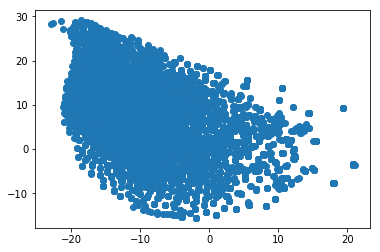

In [6]:
# PCA, t-SNE 看一下

import numpy as np
from sklearn.manifold import TSNE

model = TSNE(n_components=2, init='pca', random_state=0)
result = model.fit_transform(dataset[np.random.choice(len(dataset), 5000)])
print result.shape

x_data = np.array([x for x, y in result])
y_data = np.array([y for x, y in result])
print x_data.shape, y_data.shape

plt.scatter(x_data, y_data)
plt.show()

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=50, n_jobs=10, verbose=False)
print model

results = model.fit(dataset)
print results.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=10, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)
[25 49 25 ..., 25 25 25]


In [63]:
count = -1

In [89]:
count += 1
for i in range(len(data_pair)):
    if results.labels_[i] == count:
        print count, data_pair[i]['title'].replace('\n', ' ')

25 刘宇扬建筑事务所/南京路步行街行人服务亭 0318
25 西班牙，马德里，Matadero de Legazpi 电影中心/ch+qs arquitectos
25 Georges Batzios Architects事务所提出完全由干草建成的文化中心
25 Omnipolis
25 重庆融汇国际温泉城A区
25 李兴钢，李兴钢工作室/元上都遗址博物馆 0341
25 奥地利，海恩堡，海恩堡马丁路德教堂/Coop Himmelb(l)au
25 会所
25 美国，纽约，Camper鞋店/坂茂（Shigeru Ban）
25 印第安社区学校
25 广岛小屋
25 Kann Finch：玻璃折纸大楼
25 螺旋花园——Lily Nails美甲店
25 北京BNC薄荷糯米葱时尚概念店/张永和
25 Shrimp法院
25 AD Round Up: Classics Part V
25 Phos Restaurant in Mykonos Town
25 美国戴维斯·海灵顿欢迎中心
25 台湾花博会展馆
25 度假村式酒店
25 Whittaker Cube 住宅
25 塔鲁丹特大学
25 秘鲁，利马，米拉多住宅/2.8x arquitectos事务所
25 荷兰：空中玻璃生态屋
25 米兰，世博会慢食馆（Slow Food Pavilion）雅克·赫尔佐格&皮埃尔·德梅隆（Jacque Herzog&Pierre de Meuron）
25 法国：IN/OUT企业总部翻新
25 西班牙，Bilbao市厅/ IMB Arquitectos
25 "Pinar de Perruquet" 公园
25 比利时：W住宅
25 张轲，标准营造/南迦巴瓦冥想台 0305
25 MAD 公寓
25 Tele2 竞技场(Tele2 Arena)
25 国家会展中心（天津）
25 鹿特丹Hoogvliet校区（Campus Hoogvliet in Rotterdam）
25 美国，达拉斯，Dee and Charles Wyly 剧院/REX | OMA
25 荷兰，阿姆斯特丹，IJburg健康中心/ LEVS Architecten
25 l’aspre - 半山上的水泥住宅
25 池社
25 墨西哥，黑格尔516公寓/FRB Arquitectura
25 展览：1st卡利亚那

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(n_jobs=10)
print model

result = model.fit(dataset)
print result

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=10, p=None)


In [28]:
result.labels_

array([0, 0, 0, ..., 0, 0, 9])

In [48]:
for i in range(len(data_pair)):
    if result.labels_[i] == 17:
        print data_pair[i]['title'].replace('\n', ' ')

售楼处
Varyap 售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
售楼处
